<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/f/f5/Sharif_University_of_Technology_logo.svg" width="250" alt="cognitiveclass.ai logo"  />
</center>

# Final Proejct - Process Mining


 ## Course Info:
 
 **Course:** Business Process Management 1400-1401 <br>
 **Professor:**  Dr. Erfan Hassannayebi

## Team members:

* Sina Aghaee (99207587)
* Sahar Varchandi (99200052)
* Farzaneh Mahmoodi (99200209)

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">About the Dataset and the Paper</a></li>
        <li><a href="#pre-processing">Pre-processing</a></li>
        <li><a href="#Process_discovery">Challenge1: Process Discovery</a></li>
        <li><a href="#Customer_behaviour">Challenge2: Customer Behaviour</a></li>
        <li><a href="#BI">BI</a></li>
        <li><a href="#Prediction">Prediction</a></li>
    </ol>
</div>
<br>
<hr>

<div id="about_dataset">
    <h2>About the Dataset and the Paper</h2>
    
Our data belongs to UWV and presented in BPI 2016 Challenge.

<h3>About UWV</h3>
    
UWV (Employee Insurance Agency) is a Dutch autonomous administrative authority (ZBO) and is commissioned by the Ministry of Social Affairs and Employment (SZW) to implement employee insurances and provide labour market and data services in the Netherlands.

The Dutch employee insurances are provided for via laws such as the WW (Unemployment Insurance Act), the WIA (Work and Income according to Labour Capacity Act, which contains the IVA (Full Invalidity Benefit Regulations), WGA (Return to Work (Partially Disabled) Regulations), the Wajong (Disablement Assistance Act for Handicapped Young Persons), the WAO (Invalidity Insurance Act), the WAZ (Self-employed Persons Disablement Benefits Act), the Wazo (Work and Care Act) and the Sickness Benefits Act.

<h3>Data</h3>
    
The data in this collection pertains to customer contacts over a period of 8 months and UWV is looking for insights into their customers' journeys. The data is focused on customers in the WW (unemployment benefits) process.

Data has been collected from several different sources, namely:

1. Click data from the site www.werk.nl collected from visitors that were not logged in: 
* [BPI Challenge 2016: Clicks NOT Logged In](https://data.4tu.nl/articles/dataset/BPI_Challenge_2016_Clicks_NOT_Logged_In/12708596/1)


2. Click data from the customer specific part of the site www.werk.nl (a link is made with the customer that logged in):
* [BPI Challenge 2016: Clicks Logged In](https://data.4tu.nl/articles/dataset/BPI_Challenge_2016_Clicks_Logged_In/12674816/1)
 
    
3. Werkmap Message data, showing when customers contacted the UWV through a digital channel:
* [BPI Challenge 2016: Questions](https://data.4tu.nl/articles/dataset/BPI_Challenge_2016_Questions/12687320/1)
    
    
4. Call data from the call center, showing when customers contacted the call center by phone:
* [BPI Challenge 2016: Werkmap Messages](https://data.4tu.nl/articles/dataset/BPI_Challenge_2016_Werkmap_Messages/12714569/1)    
    
5. Complaint data showing when customers complained:
* [BPI Challenge 2016: Complaints](https://data.4tu.nl/articles/dataset/BPI_Challenge_2016_Complaints/12717647/1)
      

<h3>Paper</h3>
    
The Following is the paper that we chose as our base paper and we will try to analyze the data in the same way:
* [Identification of Distinct Usage Patterns and Prediction of Customer Behavior](https://www.win.tue.nl/bpi/lib/exe/fetch.php?media=2016:bpic2016_paper_1.pdf) by Sharam Dadashnia, Tim Niesen, Philip Hake, Peter Fettke, Nijat Mehdiyev and Joerg Evermann    

**Note**: The Author of the above article didn't use the Not_Logged_In dataset in the analysis since it doesn't contain any customer ID. We will do the same since this data won't give us much information about customers' behavior over time and in different sessions.        
    
    
    
</div>

<div id="pre-processing">
    <h2>Pre-processing</h2>
    
</div>


### Reading and cleaning the data


We will import the required libraries for pre-processing, data analysis, process mining, and discovery in the next cell:

In [3]:
# The following library and code is to igonre warnings 
import warnings
warnings.filterwarnings('ignore')

# python ######################################################################
import sys
import os
import datetime

# basics ######################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# widgets #####################################################################
import ipywidgets as widgets
from ipywidgets import interact

# process mining ##############################################################
import pm4py

# object.log
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
from pm4py.objects.log.importer.xes import importer as xes_importer

# object.conversion
from pm4py.objects.conversion.dfg import converter as dfg_converter
from pm4py.objects.conversion.process_tree import converter as pt_converter

# algo.discovery
from pm4py.algo.discovery.alpha import variants
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner

# algo.filtering
from pm4py.algo.filtering.log.auto_filter.auto_filter import apply_auto_filter

# algo.conformance
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
# vizualization
from pm4py.visualization.petrinet import visualizer as pn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer

# statistics
from pm4py.statistics.traces.log import case_statistics

# util
from pm4py.util import vis_utils

Reading the data and saving it in a datafram:

In [4]:
clicks_logged_in = pd.read_csv('BPI2016_Clicks_Logged_In.csv', sep = ';', encoding = 'latin', parse_dates=['TIMESTAMP'] )
clicks_logged_in.shape

(7174934, 20)

There is about 7 milloin Records in clicks_logged_in dataset!!! Now let's check out a sample of records in the dataset, here is the first 10 rows:

In [6]:
clicks_logged_in.head(10)

,CustomerID,AgeCategory,Gender,Office_U,Office_W,SessionID,IPID,TIMESTAMP,VHOST,URL_FILE,PAGE_NAME,REF_URL_category,page_load_error,page_action_detail,tip,service_detail,xps_info,page_action_detail_EN,service_detail_EN,tip_EN
0,2025826,50-65,V,313,313,12956475,620841,2015-10-05 10:12:56.880,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/uwv-die...,50plus,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025826,50-65,V,313,313,13243433,620841,2015-09-30 15:14:35.943,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/uwv-die...,50plus,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1503890,30-39,V,247,247,14805466,1690840,2015-09-01 19:35:06.707,digid.werk.nl,/portal/page/portal/home/diensten/aanvragen-tw,aanvragen-tw,NaN,0,NaN,NaN,3. Versturen gegevens,NaN,NaN,3. Send data,NaN
3,2063574,50-65,M,296,301,12710639,1632512,2015-11-06 10:47:42.137,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/uwv-die...,50plus,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2185161,18-29,V,327,327,44281847,757955,2016-01-11 18:44:07.877,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/bijstan...,bijstandsuitkering,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2074173,40-49,M,296,269,32607429,1855184,2015-11-09 22:43:19.973,www.werk.nl,/werk_nl/werknemer/solliciteren/europa/land/fr...,frankrijk,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2140620,30-39,V,271,274,4752535,1723649,2015-11-02 11:39:37.567,digid.werk.nl,/werk_nl/werknemer/eintake/inschrijven,inschrijven,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2099262,50-65,V,330,330,388094,967997,2015-10-28 17:00:52.393,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/inschri...,inschrijven,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1626445,50-65,M,330,330,12239424,1268110,2015-08-27 21:03:34.143,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/inschri...,inschrijven,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2096614,40-49,M,313,313,45886197,1916881,2016-01-19 10:44:52.140,digid.werk.nl,/portal/page/portal/home/diensten/aanvragen-tw,aanvragen-tw,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We only need these columns for our analysis and process discovery:

* CustomerID
* SessionID
* AgeCategory
* Gender
* TIMESTAMP
* PAGE_NAME

So we will copy these cloumns and save them in a new variable named **"clicks_logged_in_SelectedColumns"**

In [7]:
clicks_logged_in_SelectedColumns = clicks_logged_in[['CustomerID','SessionID', 'AgeCategory', 'Gender', 'TIMESTAMP', 'PAGE_NAME']].copy()

Now let's check the types of each column:

In [8]:
clicks_logged_in_SelectedColumns.dtypes

CustomerID              int64
SessionID               int64
AgeCategory            object
Gender                 object
TIMESTAMP      datetime64[ns]
PAGE_NAME              object
dtype: object

Everything seems normal!

Let's check to see if we have any NA values:

In [9]:
clicks_logged_in_SelectedColumns.isna().sum()

CustomerID     0
SessionID      0
AgeCategory    0
Gender         0
TIMESTAMP      0
PAGE_NAME      0
dtype: int64

Lucky us! there is no NA value in the dataset.

Let's see how many activites we have in total:

In [10]:
clicks_logged_in_SelectedColumns['PAGE_NAME'].nunique()

600

WOW!!! We have 600 activities!!!! That's too much! We will probably work with the most frequent ones, and since our activities are the web pages that users visited, it makes sense!

Here we export the cleaned data in CSV format for further analysis(We will use Microsoft Power BI for some visualization, so that's why we export data here and later):

In [11]:
clicks_logged_in_SelectedColumns.to_csv ('clicks_logged_in_SelectedColumns.csv', index = False)

### Segmentation of customer basis with respect to demographic features

In this part, we will segment our data in the same way our chosen article has done (the article's tables only show the result for the first four );  based on the demographic information. We will segment our data into six different data sets. We export all in CSV format for further analysis (Visualization with PowerBI) :

* Segment 1: Age 18-29
* Segment 2: Age 30-39
* Segment 3: Age 40-49
* Segment 4: Age 50-65
* Segment 5: Females
* Segment 6: Males

#### Segment 1: Age 18-29

In [12]:
clicks_logged_in_SelectedColumns_Age18_29 = clicks_logged_in_SelectedColumns[clicks_logged_in_SelectedColumns['AgeCategory']== '18-29']

In [16]:
clicks_logged_in_SelectedColumns_Age18_29.head()

,CustomerID,SessionID,AgeCategory,Gender,TIMESTAMP,PAGE_NAME
4,2185161,44281847,18-29,V,2016-01-11 18:44:07.877,bijstandsuitkering
21,1597964,26738708,18-29,M,2015-10-06 19:26:52.197,inschrijven
23,2141794,13611302,18-29,M,2015-11-07 11:49:43.160,inschrijven
59,1050218,38542939,18-29,M,2015-12-07 21:28:55.293,gegevens
80,2042991,35485709,18-29,V,2015-11-23 16:31:39.090,vacatures_bij_mijn_cv


In [13]:
# exporting csv file
clicks_logged_in_SelectedColumns_Age18_29.to_csv ('clicks_logged_in_SelectedColumns_Age18_29.csv', index = False)

#### Segment 2: Age 30-39

In [14]:
clicks_logged_in_SelectedColumns_Age30_39 = clicks_logged_in_SelectedColumns[clicks_logged_in_SelectedColumns['AgeCategory']== '30-39']

In [15]:
clicks_logged_in_SelectedColumns_Age30_39.head()

,CustomerID,SessionID,AgeCategory,Gender,TIMESTAMP,PAGE_NAME
2,1503890,14805466,30-39,V,2015-09-01 19:35:06.707,aanvragen-tw
6,2140620,4752535,30-39,V,2015-11-02 11:39:37.567,inschrijven
20,912732,40492599,30-39,M,2015-12-21 09:33:11.770,inschrijven
26,1374280,11969296,30-39,V,2015-11-01 22:21:34.910,inschrijven
45,2060461,40872837,30-39,M,2016-01-07 15:18:52.213,vacatures_bij_mijn_cv


In [16]:
# exporting csv file
clicks_logged_in_SelectedColumns_Age30_39.to_csv ('clicks_logged_in_SelectedColumns_Age30_39.csv', index = False)

#### Segment 3: Age 40-49

In [17]:
clicks_logged_in_SelectedColumns_Age40_49 = clicks_logged_in_SelectedColumns[clicks_logged_in_SelectedColumns['AgeCategory']== '40-49']

In [18]:
clicks_logged_in_SelectedColumns_Age40_49.head()

,CustomerID,SessionID,AgeCategory,Gender,TIMESTAMP,PAGE_NAME
5,2074173,32607429,40-49,M,2015-11-09 22:43:19.973,frankrijk
9,2096614,45886197,40-49,M,2016-01-19 10:44:52.140,aanvragen-tw
14,2208978,53703958,40-49,V,2016-02-25 11:46:32.767,vacatures_bij_mijn_cv
17,2208978,53703958,40-49,V,2016-02-25 11:48:03.790,vacatures_bij_mijn_cv
22,615235,44484067,40-49,V,2016-01-10 19:33:28.140,gegevens


In [19]:
# exporting csv file
clicks_logged_in_SelectedColumns_Age40_49.to_csv ('clicks_logged_in_SelectedColumns_Age40_49.csv', index = False)

#### Segment 4: Age 50-65

In [20]:
clicks_logged_in_SelectedColumns_Age50_65 = clicks_logged_in_SelectedColumns[clicks_logged_in_SelectedColumns['AgeCategory']== '50-65']

In [21]:
clicks_logged_in_SelectedColumns_Age50_65.head()

,CustomerID,SessionID,AgeCategory,Gender,TIMESTAMP,PAGE_NAME
0,2025826,12956475,50-65,V,2015-10-05 10:12:56.880,50plus
1,2025826,13243433,50-65,V,2015-09-30 15:14:35.943,50plus
3,2063574,12710639,50-65,M,2015-11-06 10:47:42.137,50plus
7,2099262,388094,50-65,V,2015-10-28 17:00:52.393,inschrijven
8,1626445,12239424,50-65,M,2015-08-27 21:03:34.143,inschrijven


In [22]:
# exporting csv file
clicks_logged_in_SelectedColumns_Age50_65.to_csv ('clicks_logged_in_SelectedColumns_Age50_65.csv', index = False)

#### Segment 5: Females

In [23]:
clicks_logged_in_SelectedColumns_Female = clicks_logged_in_SelectedColumns[clicks_logged_in_SelectedColumns['Gender']== 'V']

In [24]:
clicks_logged_in_SelectedColumns_Female.head()

,CustomerID,SessionID,AgeCategory,Gender,TIMESTAMP,PAGE_NAME
0,2025826,12956475,50-65,V,2015-10-05 10:12:56.880,50plus
1,2025826,13243433,50-65,V,2015-09-30 15:14:35.943,50plus
2,1503890,14805466,30-39,V,2015-09-01 19:35:06.707,aanvragen-tw
4,2185161,44281847,18-29,V,2016-01-11 18:44:07.877,bijstandsuitkering
6,2140620,4752535,30-39,V,2015-11-02 11:39:37.567,inschrijven


In [25]:
# exporting csv file
clicks_logged_in_SelectedColumns_Female.to_csv ('clicks_logged_in_SelectedColumns_Female.csv', index = False)

#### Segment 6: Males

In [26]:
clicks_logged_in_SelectedColumns_Male =  clicks_logged_in_SelectedColumns[clicks_logged_in_SelectedColumns['Gender']== 'M']

In [27]:
clicks_logged_in_SelectedColumns_Male.head()

,CustomerID,SessionID,AgeCategory,Gender,TIMESTAMP,PAGE_NAME
3,2063574,12710639,50-65,M,2015-11-06 10:47:42.137,50plus
5,2074173,32607429,40-49,M,2015-11-09 22:43:19.973,frankrijk
8,1626445,12239424,50-65,M,2015-08-27 21:03:34.143,inschrijven
9,2096614,45886197,40-49,M,2016-01-19 10:44:52.140,aanvragen-tw
10,1288513,52132756,50-65,M,2016-02-18 18:41:14.117,vacatures_bij_mijn_cv


In [33]:
# exporting csv file
clicks_logged_in_SelectedColumns_Male.to_csv ('clicks_logged_in_SelectedColumns_Male.csv', index = False)

### Segmentations Comparison

in the next cell, we are going to write a code to compare the segments based on age categories:

In [28]:
# create a dictionary contaning information about each age category
Segments_Comparison = {'Segment': ['Age category 18-29', 'Age category 30-39', 'Age category 40-49', 'Age category 50-65'],
                     'Number Of Sessions': [clicks_logged_in_SelectedColumns_Age18_29['SessionID'].nunique(), clicks_logged_in_SelectedColumns_Age30_39['SessionID'].nunique(), clicks_logged_in_SelectedColumns_Age40_49['SessionID'].nunique() , clicks_logged_in_SelectedColumns_Age50_65['SessionID'].nunique()] ,
                     'Number Of Customers': [clicks_logged_in_SelectedColumns_Age18_29['CustomerID'].nunique(), clicks_logged_in_SelectedColumns_Age30_39['CustomerID'].nunique(), clicks_logged_in_SelectedColumns_Age40_49['CustomerID'].nunique() , clicks_logged_in_SelectedColumns_Age50_65['CustomerID'].nunique()] ,
                     'Number of Events': [clicks_logged_in_SelectedColumns_Age18_29['SessionID'].count(), clicks_logged_in_SelectedColumns_Age30_39['SessionID'].count(), clicks_logged_in_SelectedColumns_Age40_49['SessionID'].count() , clicks_logged_in_SelectedColumns_Age50_65['SessionID'].count()],
                    }

# convert the dictionary into dataframe and add the sum of each column to the end of dataframe
Segments_Comparison = pd.DataFrame(data=Segments_Comparison)
Segments_Comparison = Segments_Comparison.append(Segments_Comparison[['Number Of Sessions','Number Of Customers','Number of Events' ]].sum(),ignore_index=True)
Segments_Comparison.iloc[4,0] = 'Total'

# we don't want decimals to be diplayed
Segments_Comparison['Number Of Sessions']=Segments_Comparison['Number Of Sessions'].apply('{:,.0f}'.format)
Segments_Comparison['Number Of Customers']=Segments_Comparison['Number Of Customers'].apply('{:,.0f}'.format)
Segments_Comparison['Number of Events']=Segments_Comparison['Number of Events'].apply('{:,.0f}'.format)

Segments_Comparison

,Segment,Number Of Sessions,Number Of Customers,Number of Events
0,Age category 18-29,"105,870","7,092","1,106,045"
1,Age category 30-39,"133,356","6,420","1,432,107"
2,Age category 40-49,"158,732","5,891","1,780,253"
3,Age category 50-65,"262,548","7,244","2,856,529"
4,Total,"660,506","26,647","7,174,934"


As you can see, the numbers in the above table are precisely the same as the numbers in the following table, which is in our base paper except for the number of events which means the author of the article deleted some records, but they didn't explain which and why.

<br>

<center>
    <img src="https://user-images.githubusercontent.com/35700552/151576540-3e1ea5bf-8b6e-41eb-aae7-a9e79d944284.PNG"  />
</center>

Segmentation info based on Gender: 

In [30]:
# create a dictionary contaning information about each gender category
Segments_Comparison = {'Segment': ['Female' ,'Male'],
                     'Number Of Sessions': [clicks_logged_in_SelectedColumns_Female['SessionID'].nunique() , clicks_logged_in_SelectedColumns_Male['SessionID'].nunique()] ,
                     'Number Of Customers': [ clicks_logged_in_SelectedColumns_Female['CustomerID'].nunique() , clicks_logged_in_SelectedColumns_Male['CustomerID'].nunique()] ,
                     'Number of Events': [clicks_logged_in_SelectedColumns_Female['SessionID'].count() , clicks_logged_in_SelectedColumns_Male['SessionID'].count()],
                    }

# convert the dictionary into dataframe and add the sum of each column to the end of dataframe
Segments_Comparison = pd.DataFrame(data=Segments_Comparison)
Segments_Comparison=Segments_Comparison.append(Segments_Comparison[['Number Of Sessions','Number Of Customers','Number of Events' ]].sum(),ignore_index=True)
Segments_Comparison.iloc[2,0] = 'Total'

# we don't want decimals to be diplayed
Segments_Comparison['Number Of Sessions']=Segments_Comparison['Number Of Sessions'].apply('{:,.0f}'.format)
Segments_Comparison['Number Of Customers']=Segments_Comparison['Number Of Customers'].apply('{:,.0f}'.format)
Segments_Comparison['Number of Events']=Segments_Comparison['Number of Events'].apply('{:,.0f}'.format)

Segments_Comparison

,Segment,Number Of Sessions,Number Of Customers,Number of Events
0,Female,"340,384","13,038","3,704,045"
1,Male,"320,104","13,609","3,470,889"
2,Total,"660,488","26,647","7,174,934"


### Activities frequency for all the logged_in dataset

In the next cell we write a code to find the most frequent activities in all logged in data:

In [31]:
# counting the repetitions of each activity for all data
activity_counts_all_logged_in = pd.DataFrame(clicks_logged_in_SelectedColumns['PAGE_NAME'].value_counts())

# calculating the relative frequency for all data
activity_counts_all_logged_in['Relative Frequency(%)'] = round(activity_counts_all_logged_in['PAGE_NAME']/len(clicks_logged_in_SelectedColumns)*100,2)

# resting the index of dataframe and renaming the columns
activity_counts_all_logged_in.reset_index(level=0, inplace=True)
activity_counts_all_logged_in=activity_counts_all_logged_in.rename(columns={'PAGE_NAME': 'Absolute Frequency','index': 'Activity' })

# we don't want decimals to be diplayed
activity_counts_all_logged_in['Absolute Frequency']=activity_counts_all_logged_in['Absolute Frequency'].apply('{:,.0f}'.format)

# printing the data for activities with more than one percent Relative Frequency
activity_counts_all_logged_in[activity_counts_all_logged_in['Relative Frequency(%)'] >= 1]

,Activity,Absolute Frequency,Relative Frequency(%)
0,taken,"1,823,175",25.41
1,vacatures_bij_mijn_cv,"953,969",13.30
2,mijn_cv,"880,597",12.27
3,home,"583,545",8.13
4,vacatures_zoeken,"582,645",8.12
5,mijn_berichten,"529,311",7.38
6,aanvragen-ww,"251,063",3.50
7,mijn_werkmap,"207,776",2.90
8,mijn_sollicitaties,"203,833",2.84
9,werkmap,"181,865",2.53


In the above table, you can see the most frequent activities for all logged-in customers (those with more than one percent relative frequency), as you see only 14 out of 600 hundred webpages visited in more than one percent of the time. 

### Activities frequency for the segment 1

Our paper only printed the table for the first segment means age between 18 to 29, so let's check out the frequency of this segment and see how close we are to what our article has done!

In [32]:
# counting the repetitions of each activity for segment 1: Age 18-29
activity_counts_logged_in_18_29 = pd.DataFrame(clicks_logged_in_SelectedColumns_Age18_29['PAGE_NAME'].value_counts())

# calculating the relative frequency for segment 1: Age 18-29
activity_counts_logged_in_18_29['Relative Frequency(%)'] = round(activity_counts_logged_in_18_29['PAGE_NAME']/len(clicks_logged_in_SelectedColumns_Age18_29)*100,2)

# resting the index of dataframe and renaming the columns
activity_counts_logged_in_18_29.reset_index(level=0, inplace=True)
activity_counts_logged_in_18_29=activity_counts_logged_in_18_29.rename(columns={'PAGE_NAME': 'Absolute Frequency','index': 'Activity' })

# we don't want decimals to be diplayed
activity_counts_logged_in_18_29['Absolute Frequency']=activity_counts_logged_in_18_29['Absolute Frequency'].apply('{:,.0f}'.format)

# printing the data for activities with more than one percent Relative Frequency
activity_counts_logged_in_18_29[activity_counts_logged_in_18_29['Relative Frequency(%)'] >= 1]

,Activity,Absolute Frequency,Relative Frequency(%)
0,taken,"327,260",29.59
1,mijn_cv,"167,479",15.14
2,home,"84,030",7.60
3,vacatures_bij_mijn_cv,"82,818",7.49
4,mijn_berichten,"79,695",7.21
5,vacatures_zoeken,"67,415",6.10
6,aanvragen-ww,"59,514",5.38
7,inschrijven,"36,224",3.28
8,mijn_werkmap,"29,060",2.63
9,mijn_sollicitaties,"27,353",2.47


As you see in the above table, the absolute frequencies have a slight difference with the following table. We mentioned this before that the reason is the authors deleted some rows which we dont know why!! However the relative frequency we calculated is the same as the numbers in the articles table.


<br>

<center>
    <img src="https://user-images.githubusercontent.com/35700552/151576558-e9853844-0f47-40d5-9bee-d1251604b457.PNG"    />
</center>




### Activities frequency for the segment 2

In [35]:
# counting the repetitions of each activity for segment 2: Age 30-39
activity_counts_logged_in_30_39 = pd.DataFrame(clicks_logged_in_SelectedColumns_Age30_39['PAGE_NAME'].value_counts())

# calculating the relative frequency for segment 2: Age 30-39
activity_counts_logged_in_30_39['Relative Frequency(%)'] = round(activity_counts_logged_in_30_39['PAGE_NAME']/len(clicks_logged_in_SelectedColumns_Age30_39)*100,2)

# resting the index of dataframe and renaming the columns
activity_counts_logged_in_30_39.reset_index(level=0, inplace=True)
activity_counts_logged_in_30_39=activity_counts_logged_in_30_39.rename(columns={'PAGE_NAME': 'Absolute Frequency','index': 'Activity' })

# we don't want decimals to be diplayed
activity_counts_logged_in_30_39['Absolute Frequency']=activity_counts_logged_in_30_39['Absolute Frequency'].apply('{:,.0f}'.format)

# printing the data for activities with more than one percent Relative Frequency
activity_counts_logged_in_30_39[activity_counts_logged_in_30_39['Relative Frequency(%)'] >= 1]

,Activity,Absolute Frequency,Relative Frequency(%)
0,taken,"396,520",27.69
1,mijn_cv,"194,749",13.60
2,vacatures_bij_mijn_cv,"142,803",9.97
3,home,"118,529",8.28
4,vacatures_zoeken,"109,997",7.68
5,mijn_berichten,"106,452",7.43
6,aanvragen-ww,"58,834",4.11
7,mijn_werkmap,"40,873",2.85
8,mijn_sollicitaties,"37,776",2.64
9,inschrijven,"37,154",2.59


### Activities frequency for the segment 3

In [34]:
# counting the repetitions of each activity for segment 3: Age 40-49
activity_counts_logged_in_40_49 = pd.DataFrame(clicks_logged_in_SelectedColumns_Age40_49['PAGE_NAME'].value_counts())

# calculating the relative frequency for segment 3: Age 40-49
activity_counts_logged_in_40_49['Relative Frequency(%)'] = round(activity_counts_logged_in_40_49['PAGE_NAME']/len(clicks_logged_in_SelectedColumns_Age40_49)*100,2)

# resting the index of dataframe and renaming the columns
activity_counts_logged_in_40_49.reset_index(level=0, inplace=True)
activity_counts_logged_in_40_49=activity_counts_logged_in_40_49.rename(columns={'PAGE_NAME': 'Absolute Frequency','index': 'Activity' })

# we don't want decimals to be diplayed
activity_counts_logged_in_40_49['Absolute Frequency']=activity_counts_logged_in_40_49['Absolute Frequency'].apply('{:,.0f}'.format)

# printing the data for activities with more than one percent Relative Frequency
activity_counts_logged_in_40_49[activity_counts_logged_in_40_49['Relative Frequency(%)'] >= 1]

,Activity,Absolute Frequency,Relative Frequency(%)
0,taken,"449,369",25.24
1,vacatures_bij_mijn_cv,"253,704",14.25
2,mijn_cv,"215,507",12.11
3,vacatures_zoeken,"156,197",8.77
4,home,"142,744",8.02
5,mijn_berichten,"125,617",7.06
6,aanvragen-ww,"57,709",3.24
7,mijn_werkmap,"51,578",2.90
8,mijn_sollicitaties,"49,699",2.79
9,werkmap,"43,688",2.45


### Activities frequency for the segment 4

In [37]:
# counting the repetitions of each activity for segment 4: Age 50-65
activity_counts_logged_in_50_65 = pd.DataFrame(clicks_logged_in_SelectedColumns_Age50_65['PAGE_NAME'].value_counts())

# calculating the relative frequency for segment 4: Age 50-65
activity_counts_logged_in_50_65['Relative Frequency(%)'] = round(activity_counts_logged_in_50_65['PAGE_NAME']/len(clicks_logged_in_SelectedColumns_Age50_65)*100,2)

# resting the index of dataframe and renaming the columns
activity_counts_logged_in_50_65.reset_index(level=0, inplace=True)
activity_counts_logged_in_50_65=activity_counts_logged_in_50_65.rename(columns={'PAGE_NAME': 'Absolute Frequency','index': 'Activity' })

# we don't want decimals to be diplayed
activity_counts_logged_in_50_65['Absolute Frequency']=activity_counts_logged_in_50_65['Absolute Frequency'].apply('{:,.0f}'.format)

# printing the data for activities with more than one percent Relative Frequency
activity_counts_logged_in_50_65[activity_counts_logged_in_50_65['Relative Frequency(%)'] >= 1]

,Activity,Absolute Frequency,Relative Frequency(%)
0,taken,"650,026",22.76
1,vacatures_bij_mijn_cv,"474,644",16.62
2,mijn_cv,"302,862",10.60
3,vacatures_zoeken,"249,036",8.72
4,home,"238,242",8.34
5,mijn_berichten,"217,547",7.62
6,werkmap,"91,749",3.21
7,mijn_sollicitaties,"89,005",3.12
8,mijn_werkmap,"86,265",3.02
9,aanvragen-ww,"75,006",2.63


### Activities frequency for the segment 5

In [43]:
# counting the repetitions of each activity for segment 5: Female
activity_counts_logged_in_Female = pd.DataFrame(clicks_logged_in_SelectedColumns_Female['PAGE_NAME'].value_counts())

# calculating the relative frequency for segment 5: Female
activity_counts_logged_in_Female['Relative Frequency(%)'] = round(activity_counts_logged_in_Female['PAGE_NAME']/len(clicks_logged_in_SelectedColumns_Female)*100,2)

# resting the index of dataframe and renaming the columns
activity_counts_logged_in_Female.reset_index(level=0, inplace=True)
activity_counts_logged_in_Female=activity_counts_logged_in_Female.rename(columns={'PAGE_NAME': 'Absolute Frequency','index': 'Activity' })

# we don't want decimals to be diplayed
activity_counts_logged_in_Female['Absolute Frequency']=activity_counts_logged_in_Female['Absolute Frequency'].apply('{:,.0f}'.format)

# printing the data for activities with more than one percent Relative Frequency
activity_counts_logged_in_Female[activity_counts_logged_in_Female['Relative Frequency(%)'] >= 1]

,Activity,Absolute Frequency,Relative Frequency(%)
0,taken,"969,759",26.18
1,mijn_cv,"456,219",12.32
2,vacatures_bij_mijn_cv,"414,784",11.20
3,vacatures_zoeken,"345,373",9.32
4,home,"300,900",8.12
5,mijn_berichten,"279,517",7.55
6,aanvragen-ww,"119,539",3.23
7,mijn_sollicitaties,"108,001",2.92
8,mijn_werkmap,"98,138",2.65
9,werkmap,"97,336",2.63


### Activities frequency for the segment 6

In [44]:
# counting the repetitions of each activity for segment 6: Male
activity_counts_logged_in_Male = pd.DataFrame(clicks_logged_in_SelectedColumns_Male['PAGE_NAME'].value_counts())

# calculating the relative frequency for segment 6: Male
activity_counts_logged_in_Male['Relative Frequency(%)'] = round(activity_counts_logged_in_Male['PAGE_NAME']/len(clicks_logged_in_SelectedColumns_Female)*100,2)

# resting the index of dataframe and renaming the columns
activity_counts_logged_in_Male.reset_index(level=0, inplace=True)
activity_counts_logged_in_Male=activity_counts_logged_in_Male.rename(columns={'PAGE_NAME': 'Absolute Frequency','index': 'Activity' })

# we don't want decimals to be diplayed
activity_counts_logged_in_Male['Absolute Frequency']=activity_counts_logged_in_Male['Absolute Frequency'].apply('{:,.0f}'.format)

# printing the data for activities with more than one percent Relative Frequency
activity_counts_logged_in_Male[activity_counts_logged_in_Male['Relative Frequency(%)'] >= 1]

,Activity,Absolute Frequency,Relative Frequency(%)
0,taken,"853,416",23.04
1,vacatures_bij_mijn_cv,"539,185",14.56
2,mijn_cv,"424,378",11.46
3,home,"282,645",7.63
4,mijn_berichten,"249,794",6.74
5,vacatures_zoeken,"237,272",6.41
6,aanvragen-ww,"131,524",3.55
7,mijn_werkmap,"109,638",2.96
8,mijn_sollicitaties,"95,832",2.59
9,werkmap,"84,529",2.28


<div id="Process_discovery">
    <h2>Challenge1: Process Discovery: Distinct Usage Patterns for www.werk.nl</h2>
    

</div>

## Segment 1: Age 18-29

In [46]:
# saving the most frequent activites of segment 1 into a list
most_frequent_activites_list_segment1 = activity_counts_logged_in_18_29[activity_counts_logged_in_18_29['Relative Frequency(%)'] >= 1]['Activity'].tolist()
most_frequent_activites_list_segment1

['taken',
 'mijn_cv',
 'home',
 'vacatures_bij_mijn_cv',
 'mijn_berichten',
 'vacatures_zoeken',
 'aanvragen-ww',
 'inschrijven',
 'mijn_werkmap',
 'mijn_sollicitaties',
 'mijn_documenten',
 'werkmap',
 'wijziging_doorgeven',
 'vragenlijst-uwv']

In [47]:
clicks_logged_in_SelectedColumns_Age18_29.head()

,CustomerID,SessionID,AgeCategory,Gender,TIMESTAMP,PAGE_NAME
4,2185161,44281847,18-29,V,2016-01-11 18:44:07.877,bijstandsuitkering
21,1597964,26738708,18-29,M,2015-10-06 19:26:52.197,inschrijven
23,2141794,13611302,18-29,M,2015-11-07 11:49:43.160,inschrijven
59,1050218,38542939,18-29,M,2015-12-07 21:28:55.293,gegevens
80,2042991,35485709,18-29,V,2015-11-23 16:31:39.090,vacatures_bij_mijn_cv


In [48]:
# copying required columns into new data frames and renaming the columns
segment_1 = clicks_logged_in_SelectedColumns_Age18_29[['SessionID', 'PAGE_NAME', 'TIMESTAMP']].copy()
segment_1=segment_1.rename(columns={'PAGE_NAME': 'activity','SessionID': 'case_id','TIMESTAMP': 'timestamp' })
segment_1.head()

,case_id,activity,timestamp
4,44281847,bijstandsuitkering,2016-01-11 18:44:07.877
21,26738708,inschrijven,2015-10-06 19:26:52.197
23,13611302,inschrijven,2015-11-07 11:49:43.160
59,38542939,gegevens,2015-12-07 21:28:55.293
80,35485709,vacatures_bij_mijn_cv,2015-11-23 16:31:39.090


In [49]:
segment_1.shape

(1106045, 3)

In [52]:
segment_1_most_frequent = segment_1.copy()

# removing records for non-frequent activities:
segment_1_most_frequent = segment_1_most_frequent[segment_1_most_frequent['activity'].isin(most_frequent_activites_list_segment1)]

## renaming  acivity name to "other" for all records with non-frequent activities:
# segment_1_most_frequent.loc[~segment_1_most_frequent['activity'].isin(most_frequent_activites_list_segment1), 'activity'] = 'other'

segment_1_most_frequent.head()

,case_id,activity,timestamp
21,26738708,inschrijven,2015-10-06 19:26:52.197
23,13611302,inschrijven,2015-11-07 11:49:43.160
80,35485709,vacatures_bij_mijn_cv,2015-11-23 16:31:39.090
81,35485709,vacatures_bij_mijn_cv,2015-11-23 16:29:56.570
82,35485709,vacatures_bij_mijn_cv,2015-11-23 16:35:22.417


In [53]:
segment_1_most_frequent.shape

(1028247, 3)

In [55]:
# creating Event Log
event_log_segment_1 = pm4py.format_dataframe(
    segment_1_most_frequent,
    case_id = 'case_id',
    activity_key = 'activity',
    timestamp_key = 'timestamp', 
    timest_format = '%Y-%m-%d %H:%M:%S%z'
)

In [56]:
event_log_segment_1.head(7)

,case:concept:name,concept:name,time:timestamp,@@index
2735409,10001342,mijn_werkmap,2015-07-30 17:39:41.533,2735409
1007277,10001342,mijn_werkmap,2015-07-30 17:40:42.017,1007277
1007527,10001342,mijn_werkmap,2015-07-30 17:42:31.367,1007527
985314,10001342,taken,2015-07-30 17:42:52.037,985314
3950525,10001342,mijn_sollicitaties,2015-07-30 17:43:07.050,3950525
3326432,10001342,wijziging_doorgeven,2015-07-30 17:44:01.497,3326432
2386729,10001342,home,2015-07-30 17:46:33.343,2386729


In [57]:
start_activities = pm4py.get_start_activities(event_log_segment_1)
end_activities = pm4py.get_end_activities(event_log_segment_1)

In [58]:
print(f'Start activities: {start_activities}')
print(f'\nEnd activities  : {end_activities}')

Start activities: {'home': 31923, 'taken': 25967, 'werkmap': 14540, 'mijn_berichten': 12856, 'mijn_werkmap': 4538, 'mijn_cv': 3259, 'wijziging_doorgeven': 2529, 'vacatures_bij_mijn_cv': 2213, 'mijn_sollicitaties': 1907, 'mijn_documenten': 1780, 'aanvragen-ww': 1169, 'vacatures_zoeken': 990, 'inschrijven': 884, 'vragenlijst-uwv': 305}

End activities  : {'home': 33444, 'taken': 30334, 'mijn_berichten': 12855, 'vacatures_bij_mijn_cv': 5467, 'wijziging_doorgeven': 4596, 'mijn_werkmap': 3642, 'mijn_cv': 3519, 'mijn_sollicitaties': 2995, 'vacatures_zoeken': 2950, 'mijn_documenten': 2699, 'aanvragen-ww': 830, 'inschrijven': 655, 'werkmap': 635, 'vragenlijst-uwv': 239}


In [59]:
xes_exporter.apply(event_log_segment_1, 'event_log_segment_1.xes')

exporting log, completed traces ::   0%|          | 0/104860 [00:00<?, ?it/s]

In [60]:
log_segment_1 = xes_importer.apply('event_log_segment_1.xes')

parsing log, completed traces ::   0%|          | 0/104860 [00:00<?, ?it/s]

In [61]:
# EventLog
type(log_segment_1)

pm4py.objects.log.obj.EventLog

In [62]:
# Trace
type(log_segment_1[0])

pm4py.objects.log.obj.Trace

In [63]:
# Event
type(log_segment_1[0][0])

pm4py.objects.log.obj.Event

In [64]:
# Start activities
pm4py.get_start_activities(log_segment_1)

{'mijn_werkmap': 4538,
 'werkmap': 14540,
 'home': 31923,
 'taken': 25967,
 'mijn_berichten': 12856,
 'wijziging_doorgeven': 2529,
 'inschrijven': 884,
 'mijn_cv': 3259,
 'vacatures_zoeken': 990,
 'mijn_documenten': 1780,
 'vacatures_bij_mijn_cv': 2213,
 'mijn_sollicitaties': 1907,
 'aanvragen-ww': 1169,
 'vragenlijst-uwv': 305}

In [65]:
# End activities
pm4py.get_end_activities(log_segment_1)

{'home': 33444,
 'mijn_berichten': 12855,
 'taken': 30334,
 'wijziging_doorgeven': 4596,
 'mijn_werkmap': 3642,
 'mijn_documenten': 2699,
 'aanvragen-ww': 830,
 'mijn_sollicitaties': 2995,
 'vacatures_bij_mijn_cv': 5467,
 'vacatures_zoeken': 2950,
 'werkmap': 635,
 'mijn_cv': 3519,
 'inschrijven': 655,
 'vragenlijst-uwv': 239}

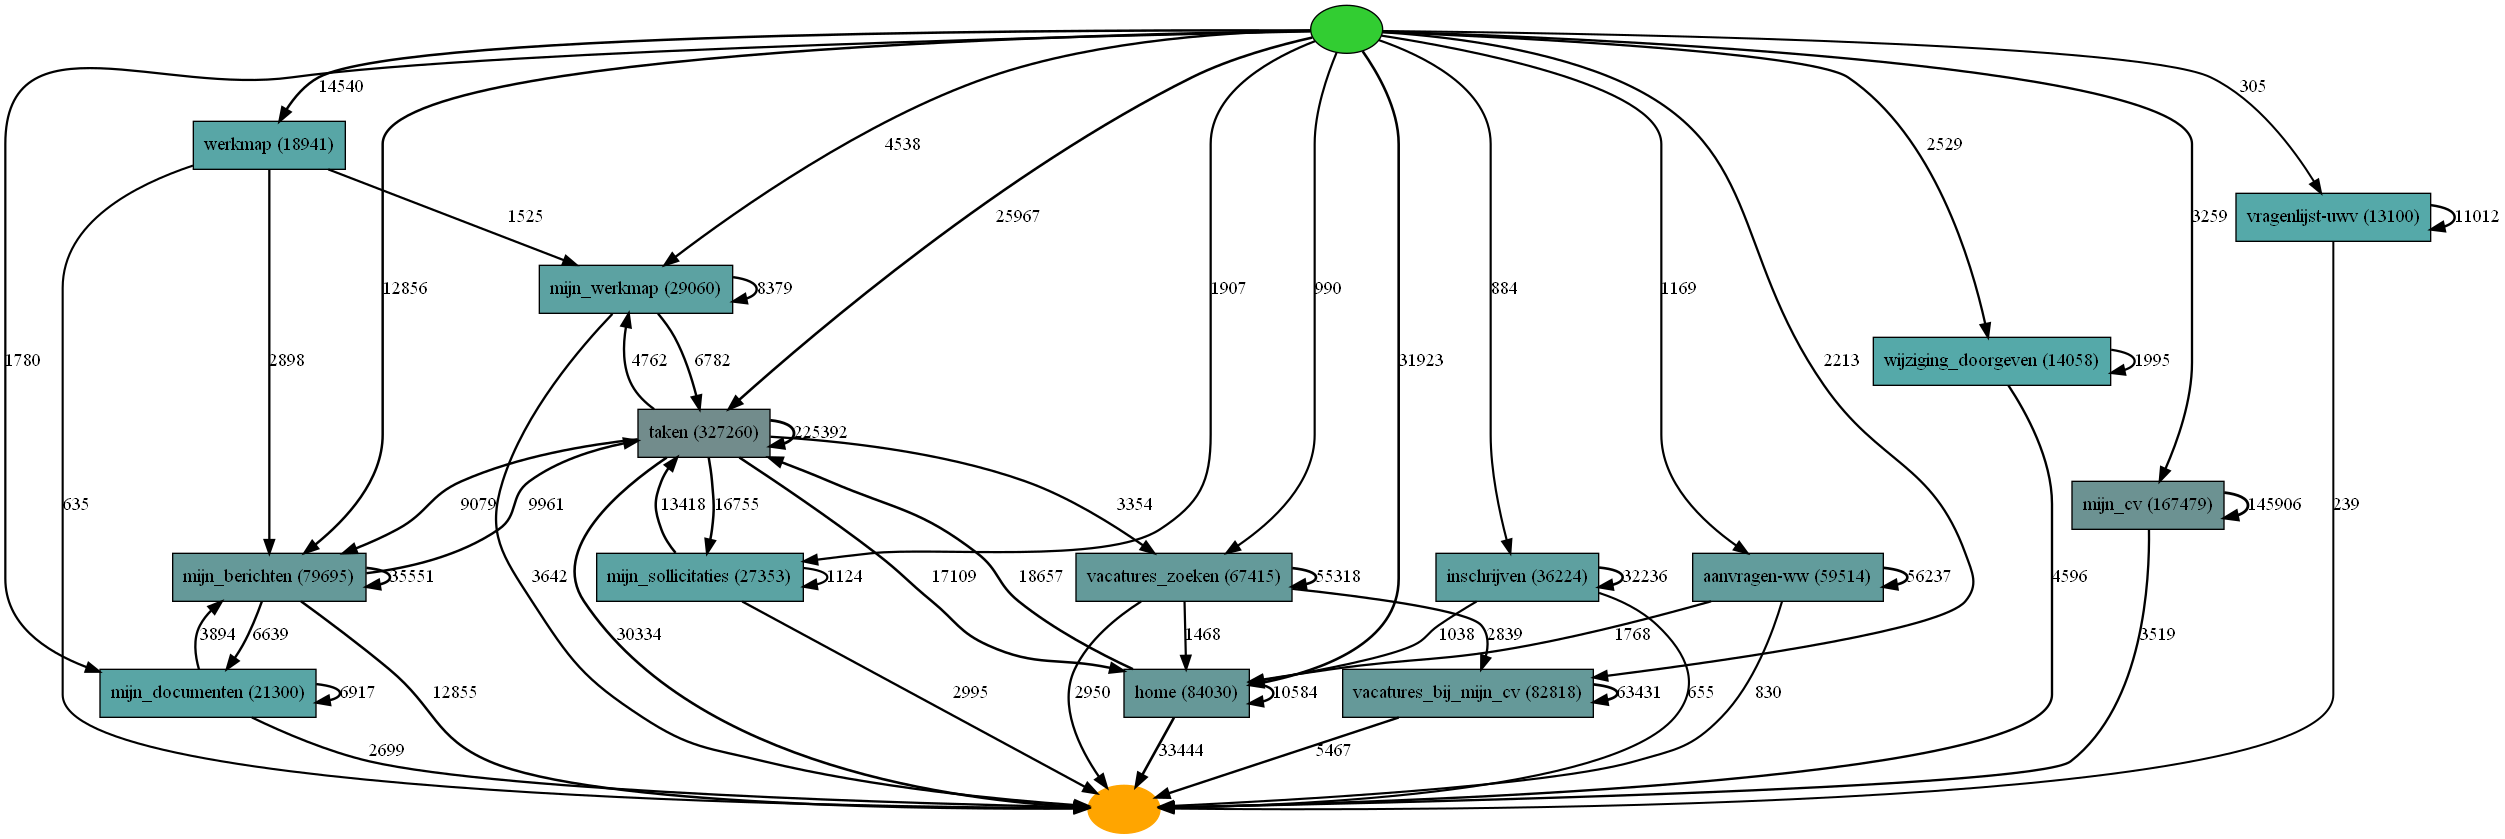

In [66]:
# Simplified Interface
heu_net = pm4py.discover_heuristics_net(
    log_segment_1, dependency_threshold=0.999, 
    and_threshold=0.999, 
    loop_two_threshold=0.999
)
pm4py.save_vis_heuristics_net(heu_net, file_path='Segment1_behavior_heuristicsminer.png') 
pm4py.view_heuristics_net(heu_net)



<center>
    <img src="https://user-images.githubusercontent.com/35700552/151678151-3bc7cccc-1c56-4393-a056-8d6fb0ad8830.png"    />
</center>



## Segment 2: Age 30-39

## Segment 3: Age 40-49

## Segment 4: Age 50-65

## Segment 5: Female

## Segment 1: Male

<div id="Customer_behaviour">
    <h2>Challenge2: Customer Behaviour: Changes of Usage Patterns Over Time</h2>

</div>

In the next cell we import the "clicks_logged_in_SelectedColumns" dataset. we exported it as a csv file in the begining of this notebook:

In [67]:
clicks_logged_in_SelectedColumns = pd.read_csv('clicks_logged_in_SelectedColumns.csv')
clicks_logged_in_SelectedColumns.head()

,CustomerID,SessionID,AgeCategory,Gender,TIMESTAMP,PAGE_NAME
0,2025826,12956475,50-65,V,2015-10-05 10:12:56.880,50plus
1,2025826,13243433,50-65,V,2015-09-30 15:14:35.943,50plus
2,1503890,14805466,30-39,V,2015-09-01 19:35:06.707,aanvragen-tw
3,2063574,12710639,50-65,M,2015-11-06 10:47:42.137,50plus
4,2185161,44281847,18-29,V,2016-01-11 18:44:07.877,bijstandsuitkering


In [68]:
#sorting values based on CustomerID and SessionID
clicks_logged_in_SelectedColumns.sort_values(['CustomerID', 'SessionID'], ascending=[True, True])

,CustomerID,SessionID,AgeCategory,Gender,TIMESTAMP,PAGE_NAME
522312,220,37784474,40-49,V,2015-12-07 10:12:33.923,mijn_berichten
525993,220,37784474,40-49,V,2015-12-07 10:12:51.353,mijn_cv
526001,220,37784474,40-49,V,2015-12-07 10:14:11.293,mijn_cv
526947,220,37784474,40-49,V,2015-12-07 10:14:49.287,mijn_cv
526953,220,37784474,40-49,V,2015-12-07 10:14:54.077,mijn_cv
...,...,...,...,...,...,...
4328687,2240448,54997653,18-29,V,2016-02-28 13:27:33.703,taken
4698173,2240448,54997653,18-29,V,2016-02-28 13:27:59.707,taken
4698544,2240448,54997653,18-29,V,2016-02-28 13:28:21.290,taken
4699334,2240448,54997653,18-29,V,2016-02-28 13:27:53.247,taken


In the next cell we are going to count number of sessions of each customer:

In [ ]:
# grouping the data by CustomerID and counting unique SessionIDs for each CustomerID 
number_of_sessions_per_customer = pd.DataFrame(clicks_logged_in_SelectedColumns.groupby('CustomerID')['SessionID'].nunique())

# grouping the data by CustomerID and counting unique SessionIDs for each CustomerID 

grouping
number_of_sessions_per_customer.reset_index(level=0, inplace=True)
number_of_sessions_per_customer = number_of_sessions_per_customer.rename(columns={'index': 'CustomerID','SessionID': '# of Sessions' })
number_of_sessions_per_customer.head(10)